In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import *
from utils_plotting import *
from utils_evaluation import *

In [10]:
sns.set(style='ticks')
sns.set_palette('cubehelix')

In [4]:
kids = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.merged.cols.500k.csv')

Data shape: (502439, 37)
Droping NANs: 403753 left
Removing errors bigger than 1: 266766 left
Removing limiting magnitudes: 109011 left
Removing IMA flags: 89450 left


In [5]:
kids_cut = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.merged.cols.500k.csv', cut='r')

Data shape: (502439, 37)
Droping NANs: 403753 left
Removing errors bigger than 1: 266766 left
Removing limiting magnitudes: 109011 left
Removing IMA flags: 89450 left
Removing R > 22: 34597 left


In [6]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True, cut='r')

Data shape: (91317, 49)
Droping NANs: 89513 left
Removing errors bigger than 1: 84491 left
Removing limiting magnitudes: 74191 left
Removing IMA flags: 55787 left
Cleaning SDSS: 52010 left
Removing R > 22: 51752 left


In [13]:
kids_x_sdss_star = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] >= 0.5]
kids_x_sdss_extended = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] <= 0.5]

print(kids_x_sdss_star.shape)
print(describe_column(kids_x_sdss_star['CLASS']))
print(kids_x_sdss_extended.shape)
print(describe_column(kids_x_sdss_extended['CLASS']))

(18456, 59)
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  163,  6381, 11912]), array([ 0.88318162, 34.57412224, 64.54269614]))
(33296, 59)
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([32384,   680,   232]), array([97.26093224,  2.04228736,  0.69678039]))


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


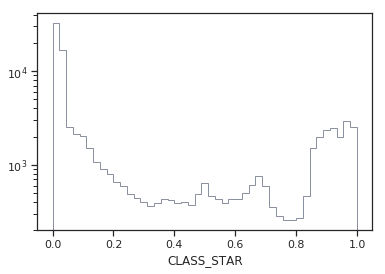

In [11]:
sns.distplot(kids['CLASS_STAR'], kde=False, rug=False, norm_hist=False,
             hist_kws={'alpha': 0.5, 'histtype': 'step'})
plt.yscale('log')

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


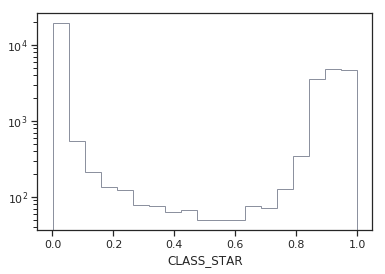

In [12]:
sns.distplot(kids_cut['CLASS_STAR'], kde=False, rug=False, norm_hist=False,
             hist_kws={'alpha': 0.5, 'histtype': 'step'})
plt.yscale('log')

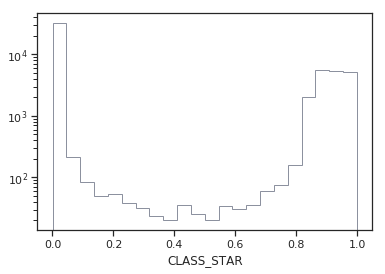

In [16]:
sns.distplot(kids_x_sdss['CLASS_STAR'], kde=False, rug=False, norm_hist=False,
             hist_kws={'alpha': 0.5, 'histtype': 'step'})
plt.yscale('log')

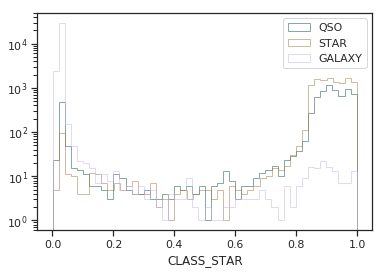

In [20]:
plot_class_histograms(kids_x_sdss, ['CLASS_STAR'], log_y=True)

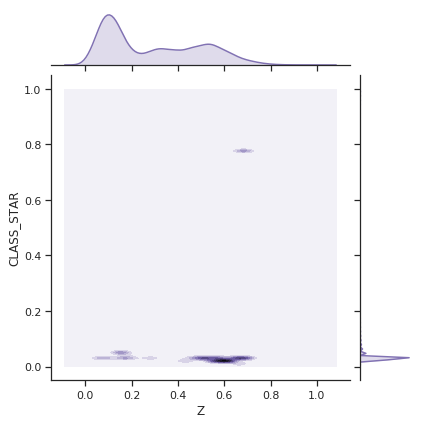

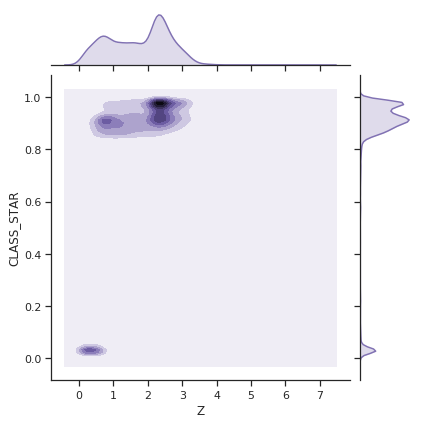

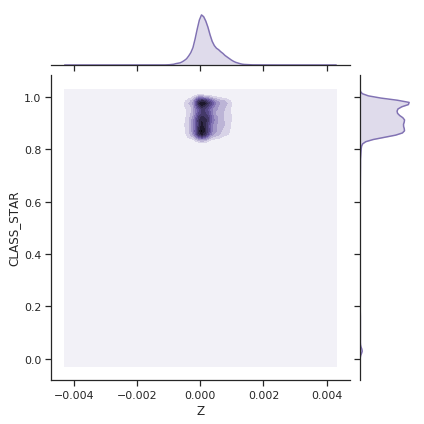

In [15]:
%matplotlib inline

# Draw density plots
for object_class in ['GALAXY', 'QSO', 'STAR']:
    subset = kids_x_sdss.loc[kids_x_sdss['CLASS'] == object_class]
    g = sns.jointplot(x='Z', y='CLASS_STAR', data=subset, kind='kde', color='m')
#     g.plot_joint(plt.scatter, c='w', s=30, linewidth=1, marker='+')
#     g.ax_joint.collections[0].set_alpha(0)
#     g.set_axis_labels('$X$', '$Y$');

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'height'
  s)
/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'height'
  s)
/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'height'
  s)


<Figure size 432x288 with 0 Axes>

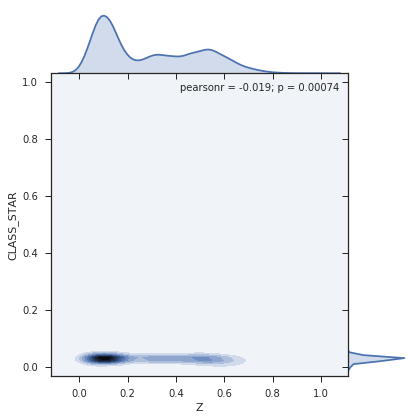

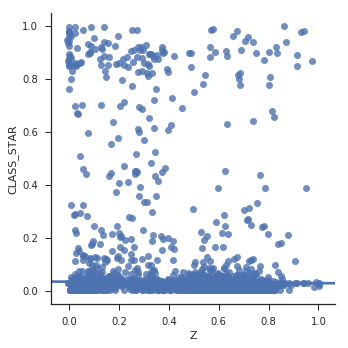

<Figure size 432x288 with 0 Axes>

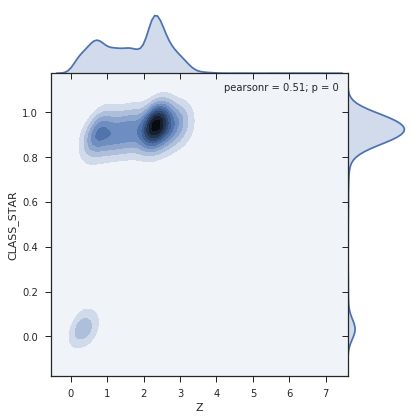

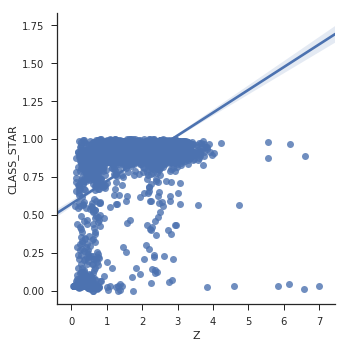

<Figure size 432x288 with 0 Axes>

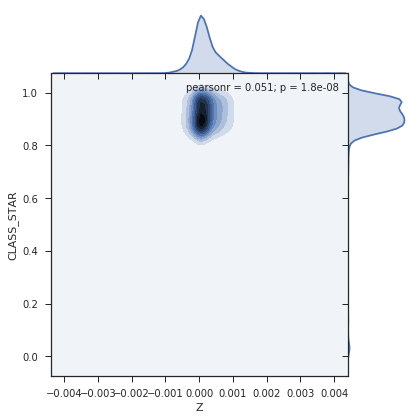

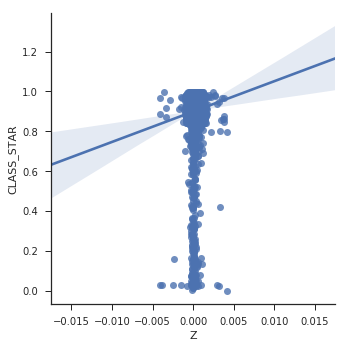

In [24]:
# Draw density plots
for object_class in ['GALAXY', 'QSO', 'STAR']:
    subset = kids_x_sdss.loc[kids_x_sdss['CLASS'] == object_class]
    plt.figure()
    sns.jointplot(subset['Z'], subset['CLASS_STAR'], kind='kde', height=7, space=0)
    sns.lmplot(x='Z', y='CLASS_STAR', data=subset)